In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Reshape
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler

In [4]:
model = MinMaxScaler(feature_range=(0,1))

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train, X_test = X_train.astype(float)/255, X_test.astype(float)/255

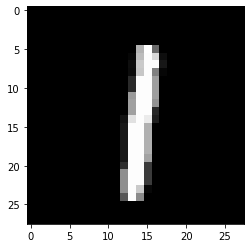

In [7]:
plt.imshow(X_train[40], cmap="gray")

In [18]:
in_layer1 = Input(shape=(28,28))
l1 = Reshape(target_shape=(784,))(in_layer1)
l2 = Dense(units=100, activation="relu")(l1)
l3 = Dense(units=30, activation="relu")(l2)

in_layer2 = Input(shape=(28,28))
l4 = Dense(units=100, activation="relu")(in_layer2)
l5 = Dense(units=784, activation="relu")(l4)

out_layer = Reshape(target_shape=(28,28))(l5)

In [22]:
encoder = Model(in_layer1, l3)
decoder = Model(in_layer2, out_layer)

In [23]:
in_layer = Input(shape=(28,28))
encoded = encoder(in_layer)
decoded = decoder(encoder)

ValueError: Attempt to convert a value (<tensorflow.python.keras.engine.training.Model object at 0x7fb82af37e50>) with an unsupported type (<class 'tensorflow.python.keras.engine.training.Model'>) to a Tensor.

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               79184     
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0     

In [11]:
model.compile(optimizer="adam", loss="mse")

In [12]:
model.fit(X_train, X_train, batch_size=200, epochs=20)

Epoch 1/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0351
Epoch 2/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0191
Epoch 3/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0174
Epoch 4/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0166
Epoch 5/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0161
Epoch 6/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0157
Epoch 7/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0154
Epoch 8/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0152
Epoch 9/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0149
Epoch 10/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0148
Epoch 11/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0146
Epoch 12/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0145
Epoch 13/20
300/300 [====

In [ ]:
gen = model.predict(X_mod[:10])